In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = pd.read_csv('~/projects/capstone/model_selection/pro_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro_y.csv', header= None)
y = y[0]

In [ ]:
yval = y.values

In [3]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y.values)

In [4]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()


np.random.seed(1)
randomForest.set_params(n_estimators=50)
randomForest.fit(X_train, y_train)
print "The training error of random forest is: %.5f" %(1-randomForest.score(X_train, y_train))
print "The test     error of random forest is: %.5f" %(1-randomForest.score(X_test, y_test))

The training error of random forest is: 0.00016
The test     error of random forest is: 0.08954


Populating the interactive namespace from numpy and matplotlib


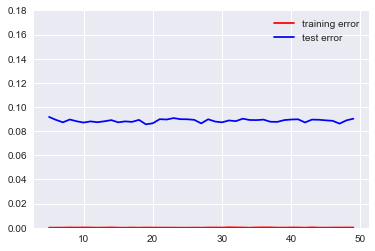

In [12]:
depth = range(5, 50)
train_error = []
test_error = []
for i in depth:
    randomForest.set_params(n_estimators=50)
    randomForest.fit(X_train, y_train)
    train_error.append(1 - randomForest.score(X_train, y_train))
    test_error.append(1 - randomForest.score(X_test, y_test))

%pylab inline
import matplotlib.pyplot as pl
pl.plot(depth, train_error, c = 'red', label = 'training error')
pl.plot(depth, test_error, c = 'blue', label = 'test error')
pl.ylim(0, 0.18)
pl.legend()
pl.show()

In [5]:
#OOB-Score
np.random.seed(1)
randomForest.set_params(oob_score=True)
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [6]:
randomForest.oob_score_

0.90971480366449775

In [13]:
import sklearn.grid_search as gs

np.random.seed(1)

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10) }]
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(X_train, y_train)

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [ ]:
np.random.seed(1)
randomForest.fit(iris.data[:, 2:4], iris.target) # fit 
randomForest.score(iris.data[:, 2:4], iris.target) # accuracy

In [ ]:
# Random Forests
rf = RandomForestClassifier(random_state = randomState)
train_sizes, train_scores, test_scores = learning_curve(estimator = rf, 
                                                        X = X, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)